# Загрузка и визуализация

In [ ]:
asset <- read.table("/content/luk.csv",header=TRUE,sep=';',row.names = 1)
head(asset)

,X.CLOSE.
,<dbl>
02/05/20,6550.5
02/06/20,6506.5
02/07/20,6450.5
02/10/20,6410.0
02/11/20,6397.5
02/12/20,6466.0


In [ ]:
tail(asset)

,X.CLOSE.
,<dbl>
01/29/21,5377.0
02/01/21,5406.0
02/02/21,5516.0
02/03/21,5555.0
02/04/21,5699.5
02/05/21,5715.0


In [ ]:
imoex<- read.table("mos.csv",header=TRUE,sep=';',row.names = 1)
head(imoex)

,X.CLOSE.
,<dbl>
02/05/20,3114.25
02/06/20,3096.68
02/07/20,3087.63
02/10/20,3062.41
02/11/20,3097.58
02/12/20,3122.27


In [ ]:
tail(imoex)

,X.CLOSE.
,<dbl>
01/29/21,3277.08
02/01/21,3291.14
02/02/21,3360.25
02/03/21,3343.46
02/04/21,3372.00
02/05/21,3392.73


In [ ]:
install.packages('PerformanceAnalytics')
library(PerformanceAnalytics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



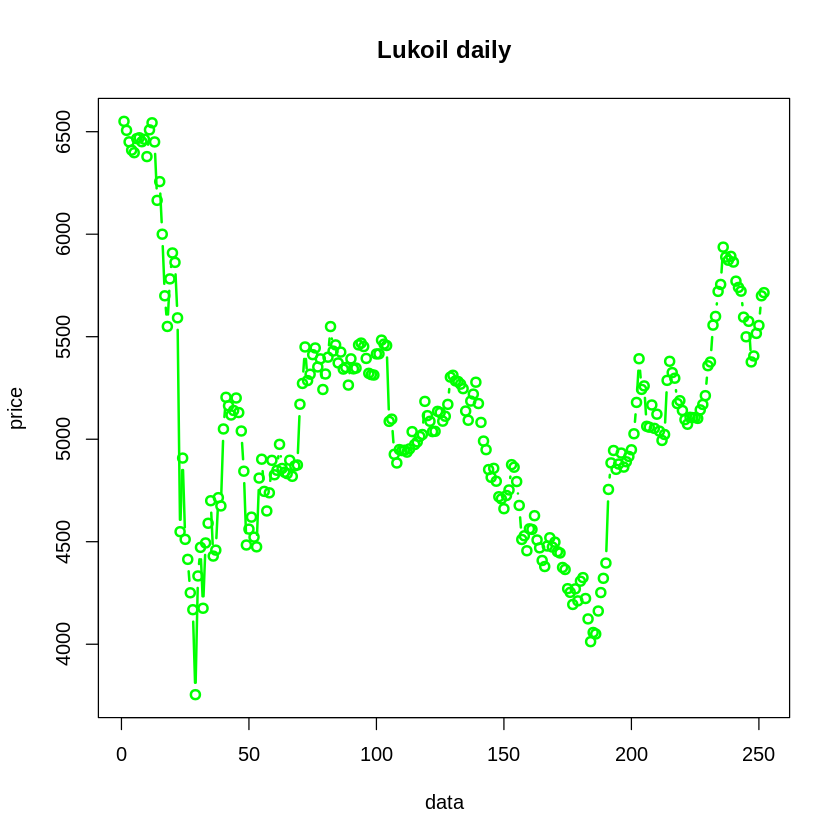

In [ ]:
colnames(asset)<- c("Lukoil")
plot(asset$Lukoil,type = 'b',main="Lukoil daily",pch = 21, col = "green",lwd = 2,xlab= 'data',ylab = "price" )

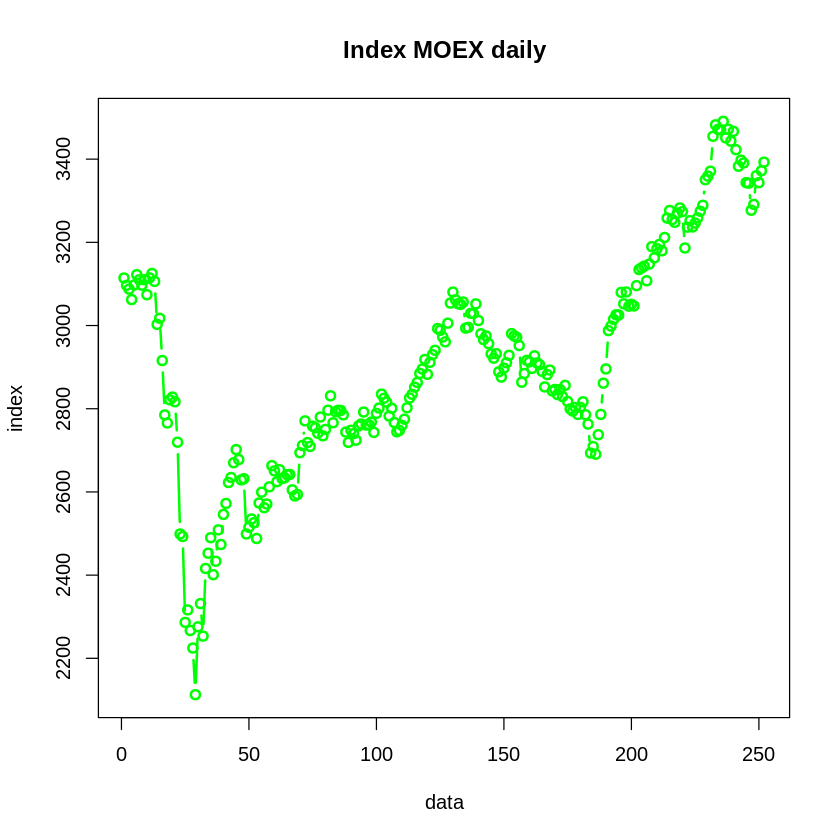

In [ ]:
colnames(imoex)<- c("IMOEX")
plot(imoex$IMOEX,type = 'b',main="Index MOEX daily",pch = 21, col = "green",lwd = 2,xlab= 'data',ylab = "index" )

In [ ]:
Rf <-0.04
len<-  dim(asset)[1]
r1 <- diff(log(asset$Lukoil))
r2 <- diff(log(imoex$IMOEX))
rates <- cbind(r1,r2)


colnames(rates)<- c("Lukoil","IMOEX")
rownames(rates)<-as.character(as.Date(rownames(asset)[2:len],"%m/%d/%y"))
head(rates)

,Lukoil,IMOEX
2020-02-06,-0.006739705,-0.005657783
2020-02-07,-0.008644030,-0.002926764
2020-02-10,-0.006298376,-0.008201619
2020-02-11,-0.001951982,0.011418974
2020-02-12,0.010650390,0.007939140
2020-02-13,0.000695706,-0.003921498


In [ ]:
#ndates <- as.Date(rates[,0], "%-%m-%d") 

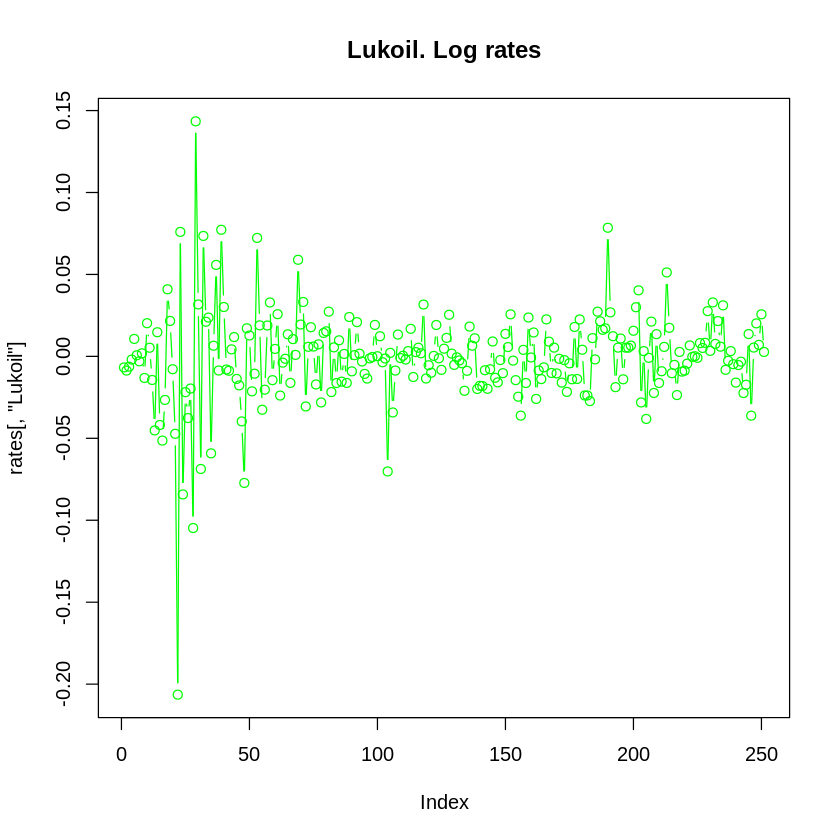

In [ ]:
plot(rates[,'Lukoil'],main= 'Lukoil. Log rates',type ='b',pch =21,col = 'green')

#Beta, Alpha, SharpeRatio

In [ ]:
beta_manual <- cov(rates[, "Lukoil"],rates[, "IMOEX"])/ var(rates[, "IMOEX"])
beta_manual

[1] 1.466053

In [ ]:
beta <- CAPM.beta(rates[, "Lukoil"],rates[, "IMOEX"])
beta

[1] 1.466053

In [ ]:
alpha <- CAPM.alpha(rates[, "Lukoil"],rates[, "IMOEX"],Rf = 0.04)
alpha

[1] 0.01759824

In [ ]:
Rf <- 0.04
(alpha_manual <- mean(rates[, "Lukoil"])-Rf- beta*(mean(rates[, "IMOEX"])- Rf))
alpha_manual

[1] 0.01759824

[1] 0.01759824

In [ ]:
SharpeRatio(rates[, "Lukoil"], Rf = Rf, p = 0.95, FUN = c("StdDev"))

"StdDev Sharpe (Rf=4%, p=95%):",-1.400321


#VAR

In [ ]:

 mean_dif <- mean(rates[,"Lukoil"])
 
 vol <- sd(rates[,"Lukoil"])
 alpha = 0.95
(VAR1 = qnorm(1-alpha,mean=mean_dif,sd=1)*vol)

[1] -0.04763932

In [ ]:
(VaR(rates[,"Lukoil"], p=.95, method="historical"))

VaR,-0.03789945


#ES

In [ ]:
ES(rates, p=.95, method="gaussian")

,Lukoil,IMOEX
ES,-0.06014641,-0.03396377


In [ ]:
ES(rates, p=.95, method="historical")

,Lukoil,IMOEX
ES,-0.07186339,-0.04438307
